<a href="https://colab.research.google.com/github/CHINMAYI-23/Almabetter-Projects/blob/main/Yes_Bank_Stock_Closingprice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name- Yes Bank Stock Closing Price Prediction

# Project Type : Regression

# Contribution: Individual


# Project Summary:

Business Context

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.


# Github Link -

# Business Objective:

The main objective is to predict the stock's closing price of the month.


In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting dataset to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading the dataset
path='/content/data_YesBank_StockPrices.csv'
data=pd.read_csv(path)

# Data Inspection

In [4]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

Date: It denotes the month & year with respect to the price of the stock.

Open: The price at which a stock started trading that month.

High: Refers to the maximum price of the stock.

Low: Refers to the minimum price of the stock.

Close: Refers to the final trading price for that month.

"Close" is the dependent variable or the target variable in this case & rest all are independent variables or input variables.

In [6]:
#Shape of the data
data.shape

(185, 5)

This dataset contains 185 entries and 5 columns

In [7]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# Handling Missing Values

In [8]:
#Check for null/missing values
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

This dataset contains no null values

In [9]:
#Check for duplicates
len(data[data.duplicated()])

0

There are no duplicates present in our data

In [10]:
#statistical description of the data
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


#Exploratory Data Analysis (EDA)

In [11]:
#Correlation
data.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


<Axes: >

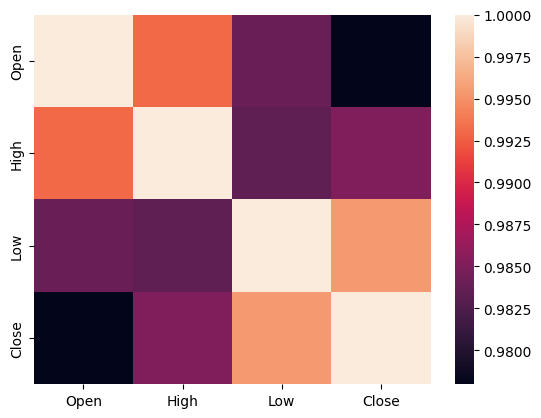

In [12]:
#Plotting correlation
sns.heatmap(data.corr())

Text(0, 0.5, 'CLOSE')

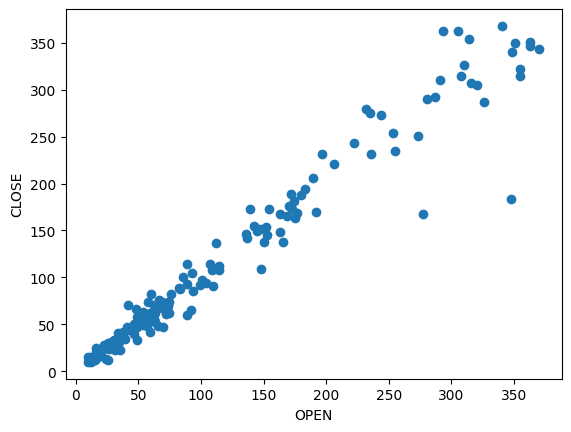

In [13]:
#Plotting scatterplots w.r.t "Close" and "Open"
plt.scatter(data['Open'], data['Close'])
plt.xlabel('OPEN')
plt.ylabel('CLOSE')


Text(0, 0.5, 'CLOSE')

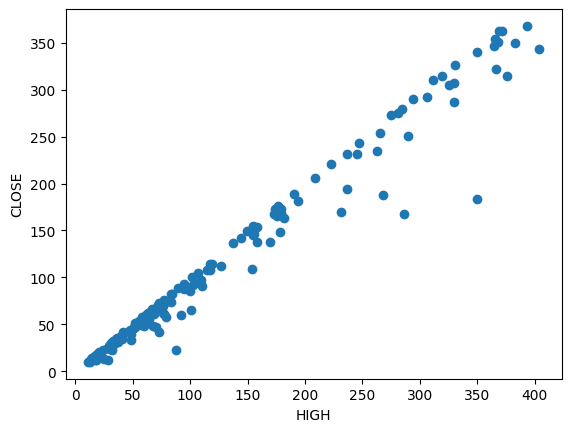

In [14]:
#Plotting scatterplot w.r.t "close" and "High"
plt.scatter(data['High'], data['Close'])
plt.xlabel('HIGH')
plt.ylabel('CLOSE')

Text(0, 0.5, 'CLOSE')

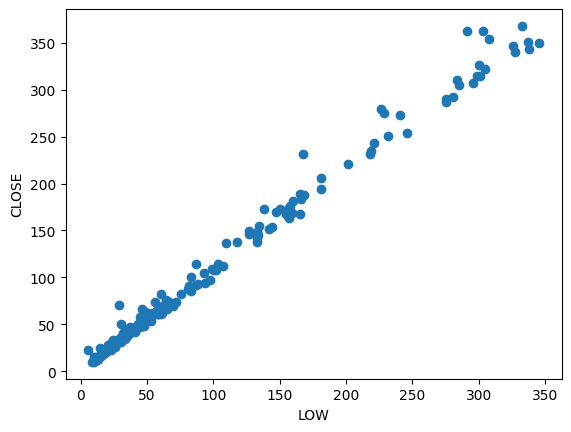

In [15]:
#Plotting scatterplot w.r.t "Close" and "Low"
plt.scatter(data['Low'], data['Close'])
plt.xlabel('LOW')
plt.ylabel('CLOSE')

In [16]:
#Converting Date column into datetime object
bank_data = data.copy()

In [17]:
import math
from datetime import datetime
bank_data['Date'] = pd.to_datetime(bank_data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [18]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [19]:
#Dependent and Independent features
X=bank_data.drop(['Close', 'Date'], axis=1)
y=bank_data['Close']

In [20]:
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [21]:
y.head()

0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64

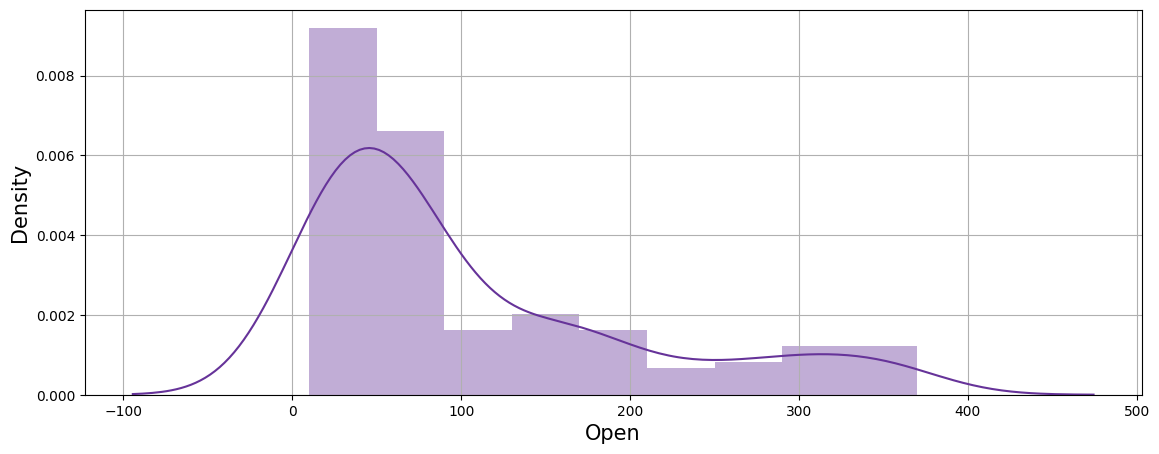

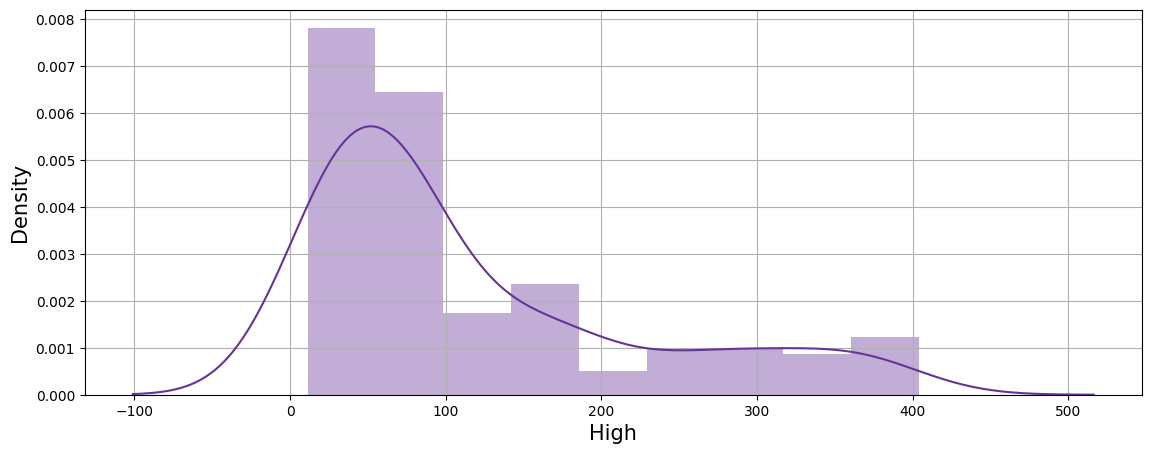

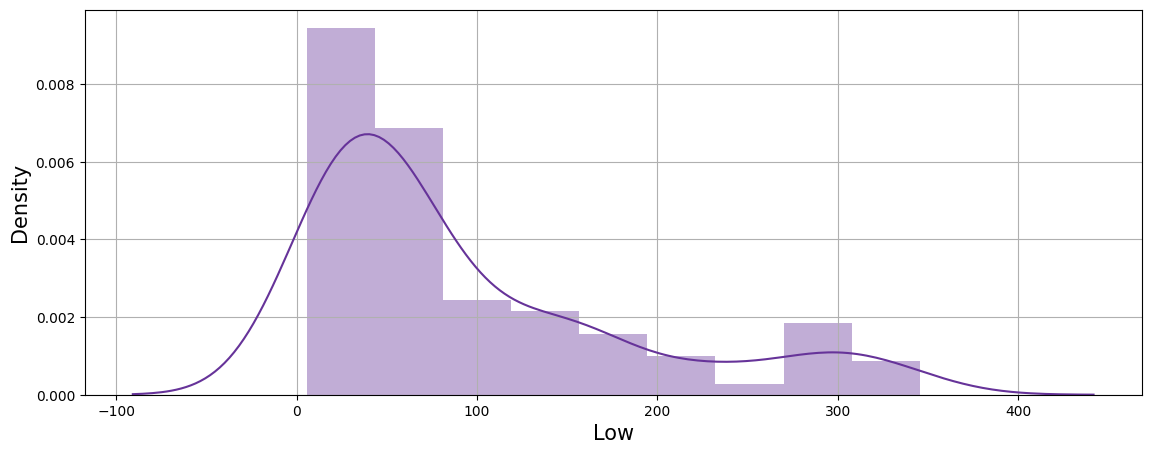

In [22]:
# Visualisation of skewness of the independent variable dataset.
for labels in X:
    plt.figure(figsize=(30,5))
    plt.subplot(1,2,2)
    fig = sns.distplot(bank_data[labels],color='rebeccapurple')
    fig.set_ylabel('Density',fontsize=15)
    fig.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

# The independent variable dataset looks positively skewed.

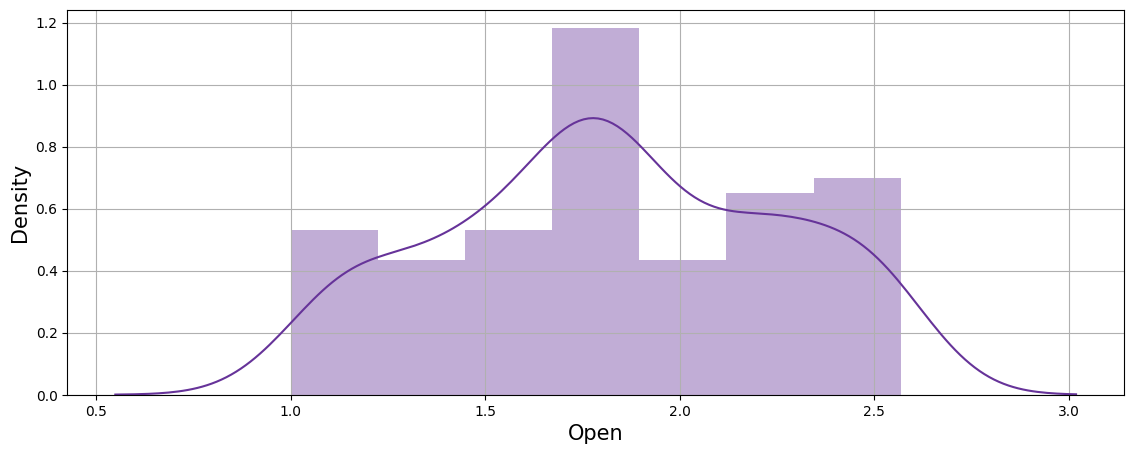

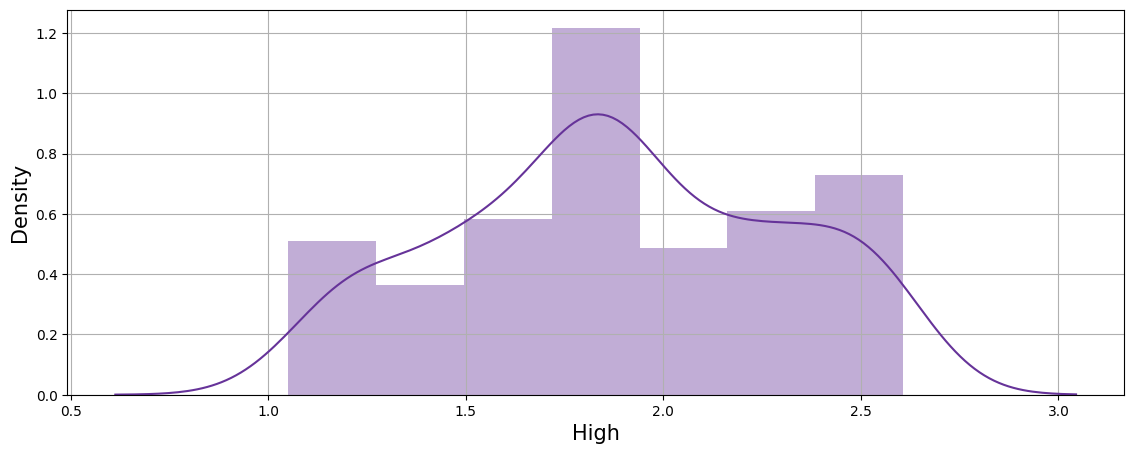

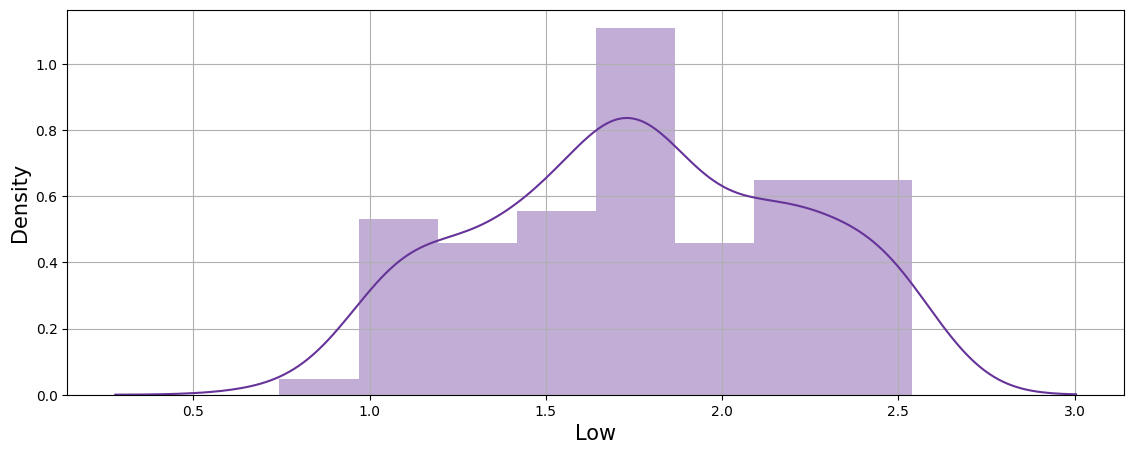

In [23]:
#Apply the log transformation
for labels in X:
    plt.figure(figsize=(30,5))
    plt.subplot(1,2,2)
    vis = sns.distplot(np.log10(bank_data[labels]),color='rebeccapurple')
    vis.set_ylabel('Density',fontsize=15)
    vis.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

# Train Test Split

In [24]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train

,Open,High,Low
65,61.80,68.36,55.44
67,53.00,57.69,46.71
31,50.88,53.97,44.40
12,16.00,17.20,13.82
41,12.40,16.56,11.13
...,...,...,...
106,88.80,117.60,86.98
14,18.00,18.88,16.80
92,94.00,100.15,83.42
179,27.75,31.95,25.55


In [26]:
X_test

,Open,High,Low
19,30.20,32.60,26.80
42,15.28,18.34,11.48
156,340.00,393.35,332.45
111,112.10,137.80,109.20
148,315.50,329.80,296.00
15,18.78,24.20,18.50
24,35.98,41.04,35.02
68,51.84,65.20,50.80
117,162.80,172.80,154.53
98,49.20,78.94,44.80


# Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
X_train_scaler=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
X_train_scaler

array([[-4.56281816e-01, -4.58914192e-01, -4.51768968e-01],
       [-5.44925689e-01, -5.58756986e-01, -5.47506419e-01],
       [-5.66280804e-01, -5.93566282e-01, -5.72839009e-01],
       [-9.17632885e-01, -9.37635592e-01, -9.08194249e-01],
       [-9.53896288e-01, -9.43624288e-01, -9.37694105e-01],
       [ 1.48985414e+00,  1.35977798e+00,  1.34300665e+00],
       [-1.39984358e-01, -9.73466609e-02, -3.76743363e-02],
       [ 2.49314161e+00,  2.41743786e+00,  2.21922914e+00],
       [-4.69175470e-01, -3.18554126e-01, -3.98033171e-01],
       [ 3.05461997e-03,  1.20406176e-02,  7.31968695e-02],
       [-8.10051457e-01, -8.19733136e-01, -8.21778314e-01],
       [ 6.23561735e-01,  5.44379563e-01,  6.55956106e-01],
       [-1.48042892e-01, -1.59105090e-01, -4.26875038e-01],
       [-4.52252549e-01, -5.02519386e-01, -4.89055032e-01],
       [ 7.34366577e-01,  1.41339552e+00,  7.89198949e-01],
       [-9.43017267e-01, -9.59438189e-01, -9.25192307e-01],
       [ 1.37904929e+00,  1.47468608e+00

# Model Training

## Linear Regression

In [31]:
#LinearRegression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [32]:
regression.fit(X_train_scaler,y_train)

LinearRegression()

In [33]:
#Print the coefficients and intercept
regression.coef_

array([-50.15576763,  57.37023306,  91.49908703])

In [34]:
regression.intercept_

106.93182432432432

In [35]:
#Prediction with test data
reg_pred=regression.predict(X_test)

In [36]:
reg_pred

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845,  23.11440842,  40.04131849,  60.83231474,
       166.62061583,  63.52165329,  47.4734753 , 196.91772952,
        67.07512217,  36.85762403,  15.34937858,  26.28559837,
        45.25633442,  25.26888268,  62.4263825 ,  52.3074695 ,
       180.4462878 , 153.71093779, 376.13707477,  35.9615265 ,
        19.90822916, 135.14405783,  59.90906945,  32.63530288,
        51.02426854, 146.93301779,  56.91809176,  48.68058951,
       167.37444336, 262.18882906,  52.89811131,  51.74836864,
        36.04731752])

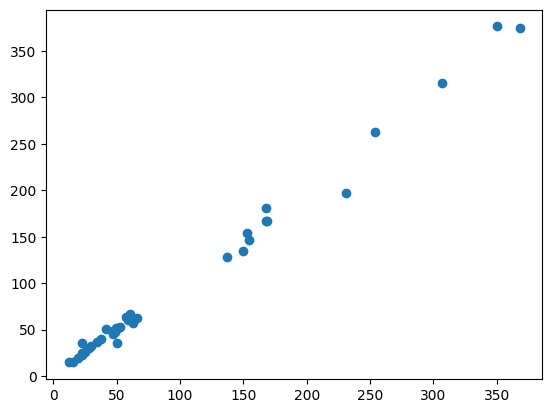

In [37]:
#Plotting a scatter plot w.r.t prediction
plt.scatter(y_test,reg_pred)

In [38]:
#Residuals
residuals=y_test - reg_pred
residuals

19     -1.552522
42     -2.452830
156    -6.121906
111     8.868694
148    -8.909468
15     -0.334408
24     -2.111318
68      1.147685
117     1.339384
98     -6.021653
97      1.176525
163    34.282270
69     -6.055122
175    -2.307624
45      0.100621
16     -0.965598
51      2.053666
35     -2.418883
82      3.593617
56     -1.337470
165   -12.446288
124    -0.410938
146   -26.137075
30     14.578474
9      -0.418229
126    14.235942
60     -0.919069
18     -2.475303
170    -9.574269
113     7.636982
75      5.981908
55     -1.360590
119     1.225557
135    -8.668829
66     -0.308111
29     -1.938369
176   -13.597318
Name: Close, dtype: float64

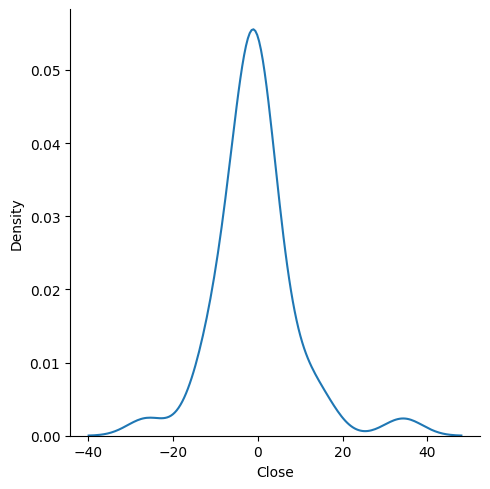

In [39]:
#Plot the residuals
sns.displot(residuals, kind="kde")

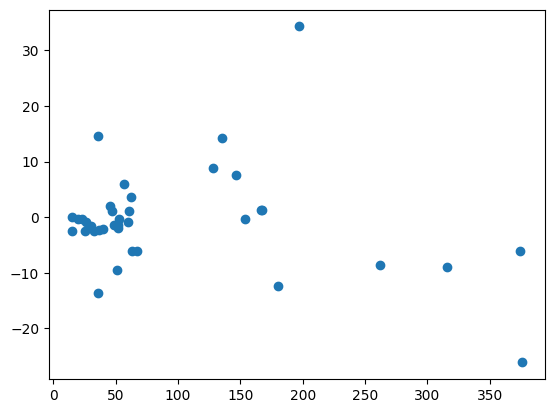

In [40]:
#Plot a scatter plot w.r.t reg_pred and residuals
plt.scatter(reg_pred,residuals)

In [41]:
#Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [42]:
MAE=print(mean_absolute_error(y_test,reg_pred))
MSE=print(mean_squared_error(y_test,reg_pred))
RMSE=print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.812554509942107
86.64379126513752
9.30826467528387


In [43]:
score=r2_score(y_test,reg_pred)
print(score)

0.9904142726548665


In [44]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.989542842896218

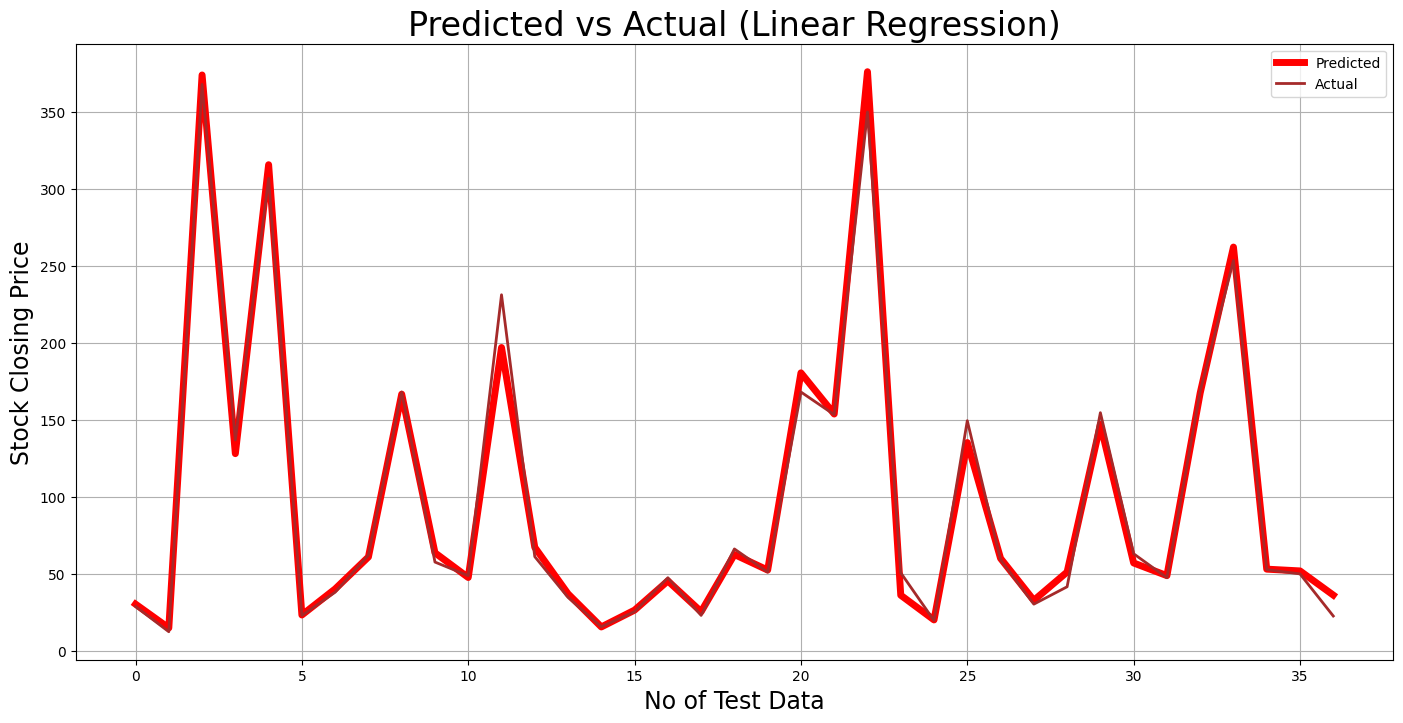

In [45]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(reg_pred,color='red',linewidth=5)
plt.plot(np.array(y_test),color='brown',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Linear Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred = Predicted values
# y_test = Actual values

# Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lasso=Lasso()
lasso.fit(X_train_scaler,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,reg_pred)
score=r2_score(y_test,reg_pred)
mse=mean_squared_error(y_test,reg_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared Error", mse)
print((np.sqrt(mean_squared_error(y_test,reg_pred))))

Mean absolute error 5.812554509942107
R2 Score 0.9904142726548665
Mean Squared Error 86.64379126513752
9.30826467528387


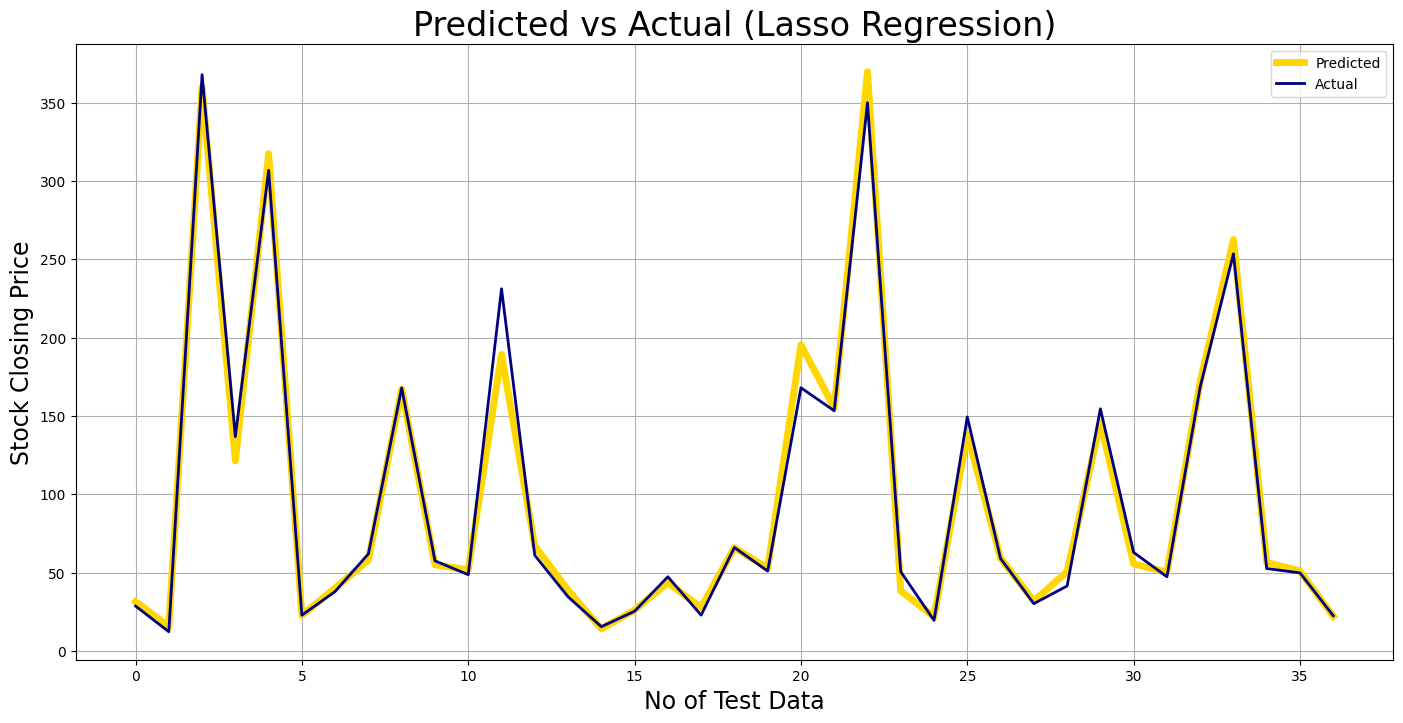

In [47]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred,color='gold',linewidth=5)
plt.plot(np.array(y_test),color='navy',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

# y_pred = Predicted values
# y_test = Actual values

# Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaler,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,reg_pred)
score=r2_score(y_test,reg_pred)
mse=mean_squared_error(y_test,reg_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared Error", mse)
print((np.sqrt(mean_squared_error(y_test,reg_pred))))

Mean absolute error 5.812554509942107
R2 Score 0.9904142726548665
Mean Squared Error 86.64379126513752
9.30826467528387


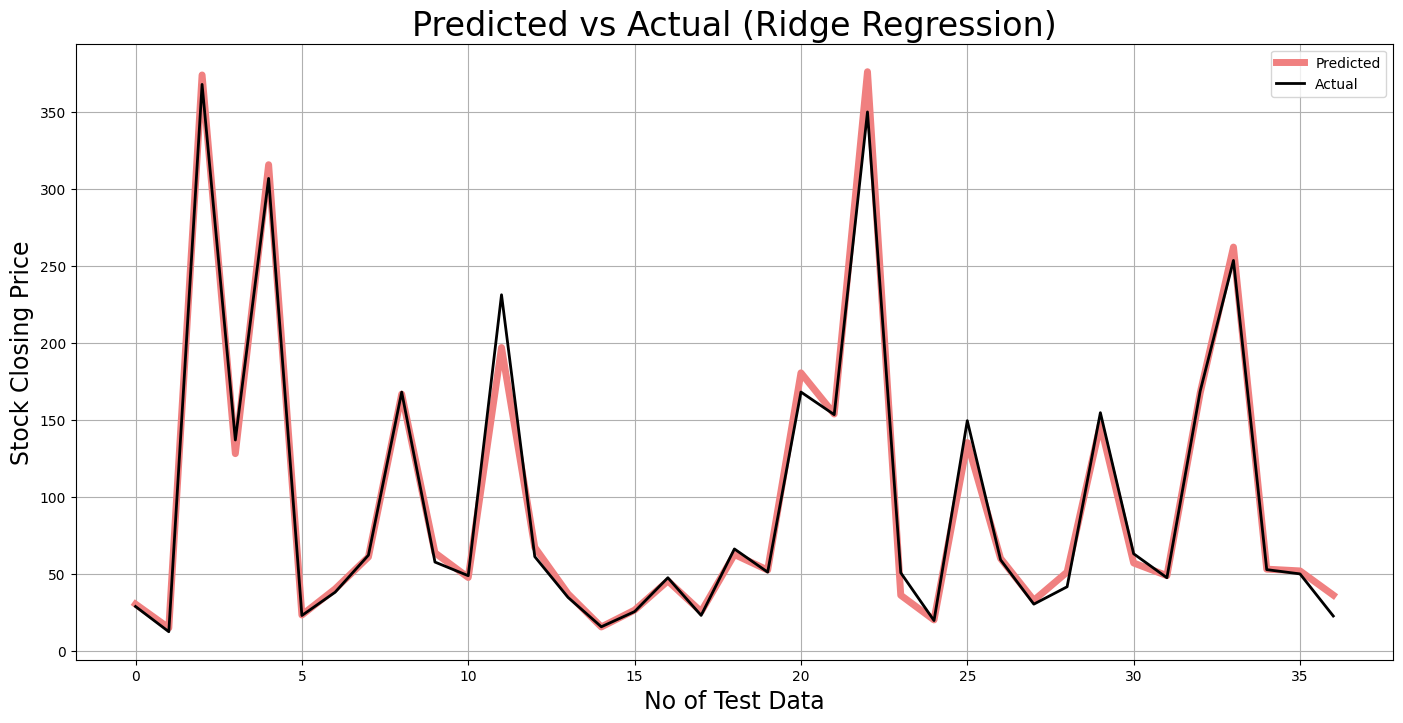

In [49]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(reg_pred,color='lightcoral',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred = Predicted values
# y_test = Actual values

# Elastic Net Regression

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaler,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,reg_pred)
score=r2_score(y_test,reg_pred)
mse=mean_squared_error(y_test,reg_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared Error", mse)
print((np.sqrt(mean_squared_error(y_test,reg_pred))))


Mean absolute error 5.812554509942107
R2 Score 0.9904142726548665
Mean Squared Error 86.64379126513752
9.30826467528387


# Cross Validation and Hyper Parameter Tuning of all the Models

In [51]:
#Cross Validation Lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaler,y_train)

LassoCV(cv=5)

In [52]:
lassocv.alphas_

array([9.86334519e+01, 9.19858873e+01, 8.57863464e+01, 8.00046338e+01,
       7.46125892e+01, 6.95839504e+01, 6.48942251e+01, 6.05205715e+01,
       5.64416875e+01, 5.26377067e+01, 4.90901014e+01, 4.57815929e+01,
       4.26960668e+01, 3.98184947e+01, 3.71348615e+01, 3.46320961e+01,
       3.22980087e+01, 3.01212310e+01, 2.80911609e+01, 2.61979107e+01,
       2.44322592e+01, 2.27856067e+01, 2.12499330e+01, 1.98177587e+01,
       1.84821081e+01, 1.72364758e+01, 1.60747951e+01, 1.49914077e+01,
       1.39810370e+01, 1.30387619e+01, 1.21599930e+01, 1.13404501e+01,
       1.05761417e+01, 9.86334519e+00, 9.19858873e+00, 8.57863464e+00,
       8.00046338e+00, 7.46125892e+00, 6.95839504e+00, 6.48942251e+00,
       6.05205715e+00, 5.64416875e+00, 5.26377067e+00, 4.90901014e+00,
       4.57815929e+00, 4.26960668e+00, 3.98184947e+00, 3.71348615e+00,
       3.46320961e+00, 3.22980087e+00, 3.01212310e+00, 2.80911609e+00,
       2.61979107e+00, 2.44322592e+00, 2.27856067e+00, 2.12499330e+00,
      

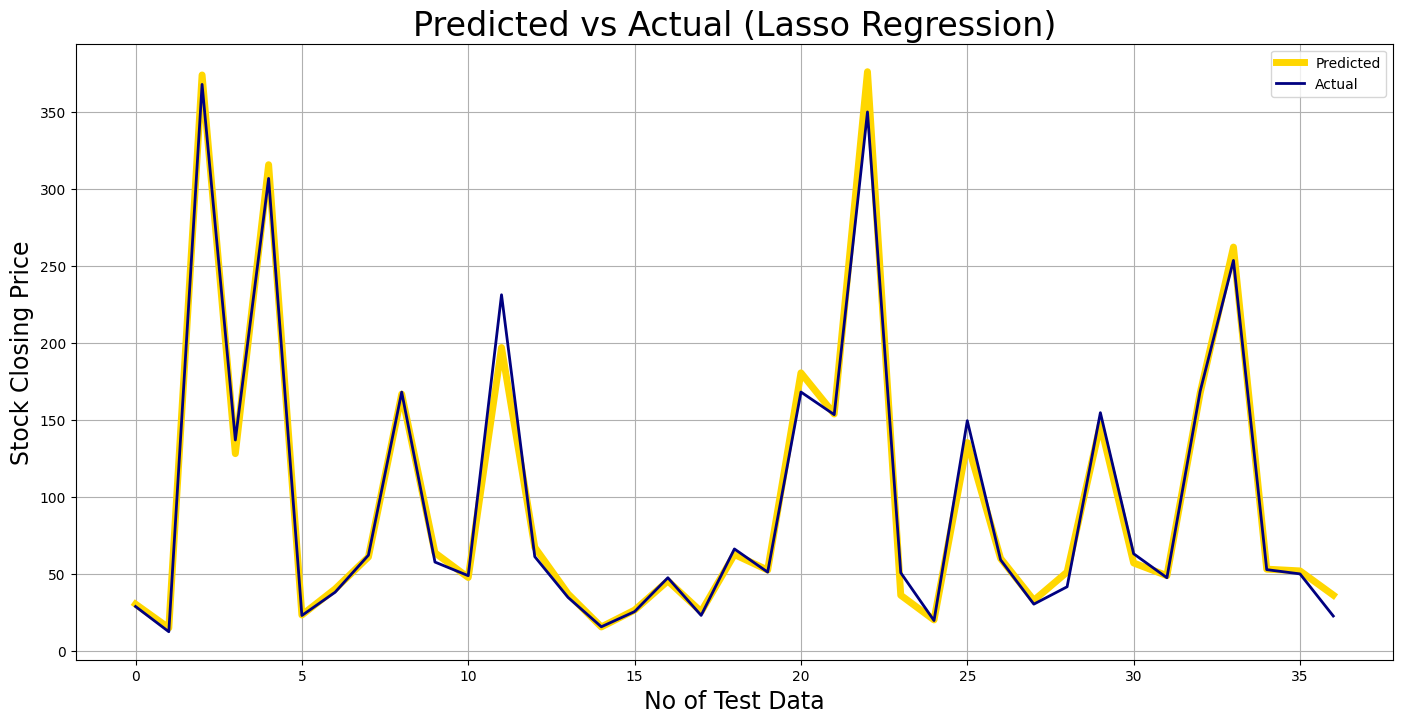

In [53]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(reg_pred,color='gold',linewidth=5)
plt.plot(np.array(y_test),color='navy',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred = Predicted values
# y_test = Actual values

In [54]:
y_pred=lassocv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)
print("Mean Squared Error", mse)
print((np.sqrt(mean_squared_error(y_test,y_pred))))


Mean absolute error: 5.746779979095677
R2 Score: 0.9901528668690448
Mean Squared Error 89.00659457956012
9.43433063760011


In [55]:
#Cross validation on Ridge
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaler,y_train)
y_pred=ridgecv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)
print("Mean Squared Error", mse)
print((np.sqrt(mean_squared_error(y_test,y_pred))))

Mean absolute error: 5.787888973221014
R2 Score: 0.9903843340072908
Mean Squared Error 86.91440170896843
9.322789373839164


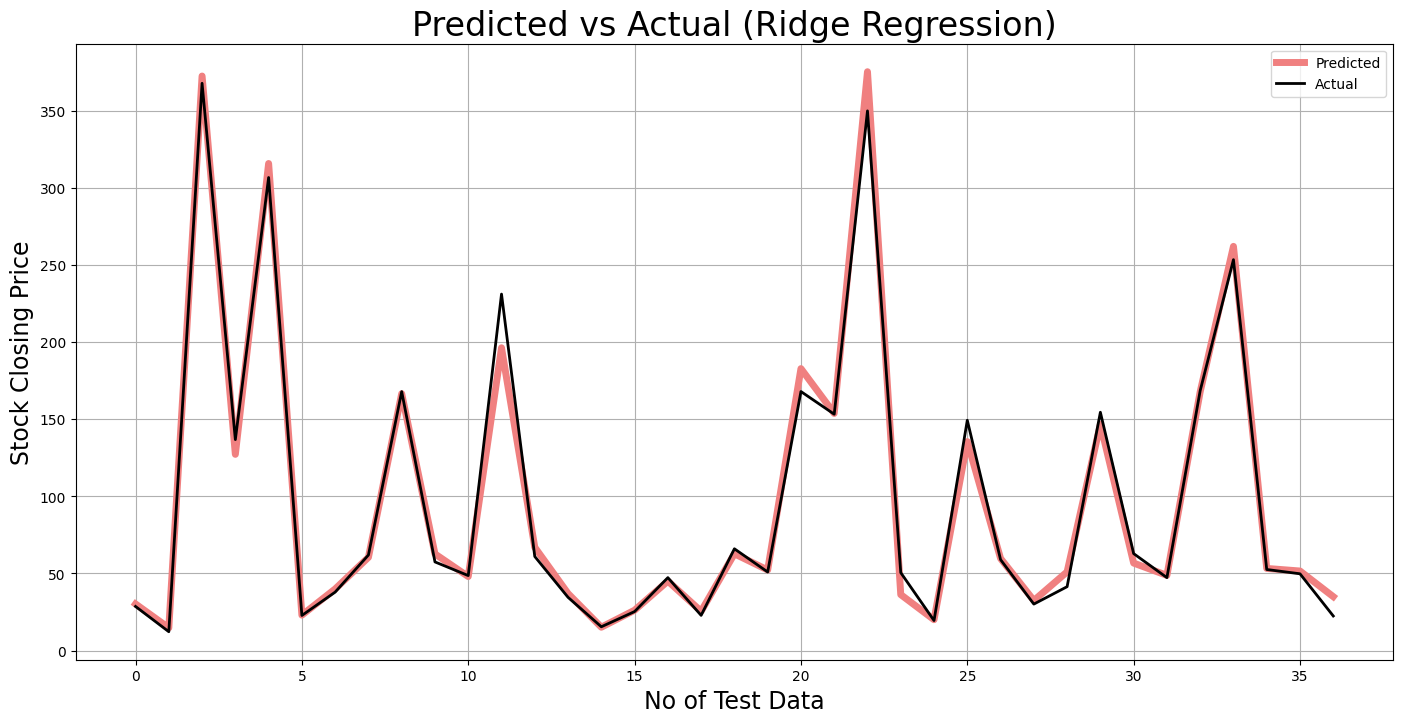

In [56]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred,color='lightcoral',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

# y_pred = Predicted values
# y_test = Actual values

In [57]:
#Cross Validation on ElasticNet
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaler,y_train)
y_pred=elasticcv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)
print("Mean Squared Error", mse)
print((np.sqrt(mean_squared_error(y_test,y_pred))))

Mean absolute error: 7.815003559008437
R2 Score: 0.9795243461510961
Mean Squared Error 185.07602127889723
13.604264819493086


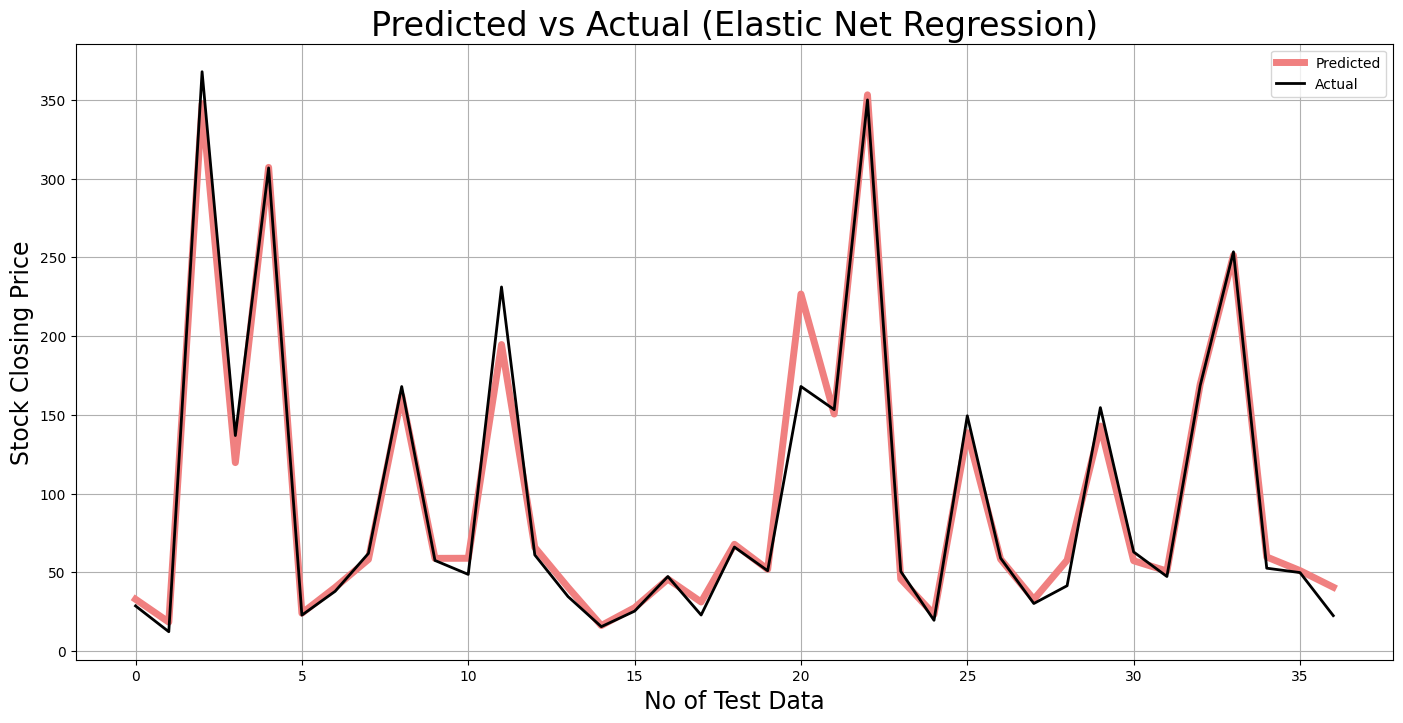

In [58]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred,color='lightcoral',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Elastic Net Regression)',fontsize=24)
plt.grid()
plt.show()

# y_pred = Predicted values
# y_test = Actual values

In [59]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Lasso Regression','Ridge Regression','Elastic Net Regression'], 'Score' : [0.9904,0.9901,0.9903,0.9795]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.9904,Linear Regression
0.9903,Ridge Regression
0.9901,Lasso Regression
0.9795,Elastic Net Regression


# Conclusions:

1. The accuracy for each model is more than 95%
2. The linear regression model has given an r2 score of around 99.04% which has the highest score out of all the other models
3. Independent variables(input variable) have a very high influence on dependent variable(target variable).